In [1]:
# Import necessary Python packages
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

In [2]:
# Define necessary parameters (as constants)
X              = 10                # number of photons flowing into the detector system (positive integer)
P_D            = 1e-6              # dark count probability (real number between 0 and 1)
ETA            = 0.1               # detector efficiency (real number between 0 and 1)
MU             = 0.02              # mean number of photons detected on some time interval (positive real number)
P_AB           = 0.5               # probability of detecting the coincidence A B (real number between 0 and 1)
P_A_BAR_B      = 0                 # probability of detecting the coincidence A-bar B (real number between 0 and 1)
P_A_B_BAR      = 0                 # probability of detecting the coincidence A B-bar (real number between 0 and 1)
P_A_BAR_B_BAR  = 0.5               # probability of detecting the coincidence A-bar B-bar (real number between 0 and 1)
P_A            = P_AB + P_A_B_BAR  # probability of detecting one basis A (real number between 0 and 1)
P_B            = P_AB + P_A_BAR_B  # probability of detecting one basis B (real number between 0 and 1)
PROBABILITIES  = [P_AB, P_A_BAR_B, P_A_B_BAR, P_A_BAR_B_BAR]

In [3]:
def partitions(k, n):
    masks = np.identity(k, dtype=int)
    for c in itertools.combinations_with_replacement(masks, n):
        yield sum(c)

def multinomial(photon, prob):
    multinomial_coeff = math.factorial(sum(photon)) / (math.factorial(photon[0]) * math.factorial(photon[1]) * math.factorial(photon[2]) * math.factorial(photon[3]))
    prob_coeff = prob[0]**photon[0] * prob[1]**photon[1] * prob[2]**photon[2] * prob[3]**photon[3]
    return multinomial_coeff * prob_coeff

In [4]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_2_error(p_d, eta, mu):
    case2_approx = (1 - p_d)**2 * np.exp(mu * ((1 - eta)**2 - 1)) * ((p_d + mu * P_A * eta) * (p_d + mu * P_B * eta) + mu * P_AB * eta**2)
    case2_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_2 = (1 - p_d)**2 * (1 - eta)**(2 * photons[3] + photons[1] + photons[2]) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[2])) * (1 - (1 - p_d) * (1 - eta)**(photons[0] + photons[1]))
            sum_multinomial += single_coin_2 * multinomial(photons, PROBABILITIES)
        case2_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    error_2 = np.abs(case2_actual - case2_approx)
    return error_2

In [5]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_3_error(p_d, eta, mu):
    case3_approx = (p_d + (1 - 2 * p_d) * mu * P_A * eta) * (p_d + (1 - 2 * p_d) * mu * P_B * eta) + (1 - 2 * p_d)**2 * mu * P_AB * eta**2
    case3_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_3 = (1 - eta)**(2 * photons[0] + photons[1] + photons[2] - 2) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[2]) * eta) * (p_d * (1 - eta) + (1 - p_d) * (photons[0] + photons[1]) * eta)
            sum_multinomial += single_coin_3 * multinomial(photons, PROBABILITIES)
        case3_actual += np.exp(-mu) * (mu**x / math.factorial(x)) * sum_multinomial
    error_3 = np.abs(case3_actual - case3_approx)
    return error_3

In [6]:
# m_1 = m_(a b) + m_(a b-bar)
# m_2 = m_(a-bar b) + m_(a-bar b-bar)
# m_3 = m_(a b) + m_(a-bar b)
# m_4 = m_(a b-bar) + m_(a-bar b-bar)
def case_4_error(p_d, eta, mu):
    case4_approx = (p_d + (1 - p_d) * mu * P_A * eta) * (p_d + (1 - p_d) * mu * P_B * eta) + (1 - p_d)**2 * mu * P_AB * eta**2
    case4_actual = 0
    for x in range(X + 1):
        photons_freq = np.array(list(partitions(4, x)))
        sum_multinomial = 0
        for photons in photons_freq:
            if x == 0:
                photons = [0, 0, 0, 0] # [m_(a b), m_(a-bar b), m_(a b-bar), m_(a-bar b-bar)]
            single_coin_4 = (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[2]))) * (p_d + (1 - p_d) * (1 - (1 - eta)**(photons[0] + photons[1])))
            sum_multinomial += single_coin_4 * multinomial(photons, PROBABILITIES)
        case4_actual += np.exp(-mu) * mu**x / math.factorial(x) * sum_multinomial
    error_4 = np.abs(case4_actual - case4_approx)
    return error_4

In [7]:
# Error bound based on varying dark count probability
error_2_PD = []
error_3_PD = []
error_4_PD = []
range_PD = np.arange(0.001, 1, 0.001)
for p_d in range_PD:
    error_2_PD.append(case_2_error(p_d, ETA, MU))
    error_3_PD.append(case_3_error(p_d, ETA, MU))
    error_4_PD.append(case_4_error(p_d, ETA, MU))
print(error_2_PD)
print(error_3_PD)
print(error_4_PD)

[2.0211323543621433e-07, 3.993501356995891e-07, 5.957956882530417e-07, 7.914510837022238e-07, 9.863175126526653e-07, 1.1803961657103567e-06, 1.373688233480421e-06, 1.5661949065686321e-06, 1.7579173755807908e-06, 1.948856831122481e-06, 2.1390144637991237e-06, 2.3283914642166286e-06, 2.516989022980471e-06, 2.704808330696506e-06, 2.8918505779699654e-06, 3.078116955407056e-06, 3.2636086536129015e-06, 3.4483268631933296e-06, 3.6322727747539513e-06, 3.815447578900269e-06, 3.997852466238166e-06, 4.179488627373035e-06, 4.36035725291065e-06, 4.540459533456786e-06, 4.719796659616781e-06, 4.8983698219966275e-06, 5.076180211201556e-06, 5.253229017837123e-06, 5.429517432509754e-06, 5.605046645823812e-06, 5.779817848386047e-06, 5.953832230801799e-06, 6.1270909836766245e-06, 6.299595297616081e-06, 6.471346363225942e-06, 6.642345371111764e-06, 6.812593511879321e-06, 6.982091976133302e-06, 7.1508419544805656e-06, 7.318844637526668e-06, 7.4861012158763e-06, 7.652612880136751e-06, 7.818380820911845e-06, 

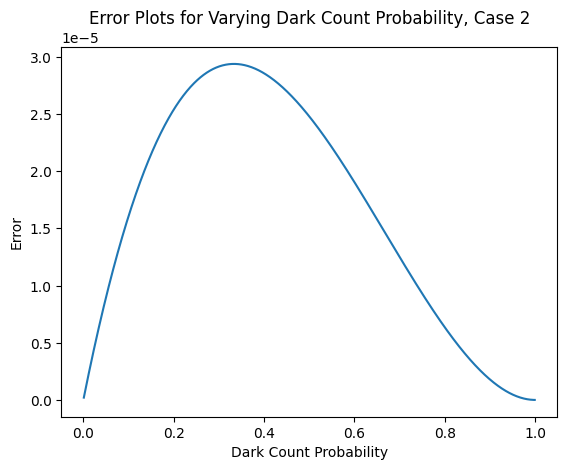

In [8]:
plt.plot(range_PD, error_2_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Error')
plt.title('Error Plots for Varying Dark Count Probability, Case 2')
plt.savefig("error_2_PD_1.png")
plt.show()

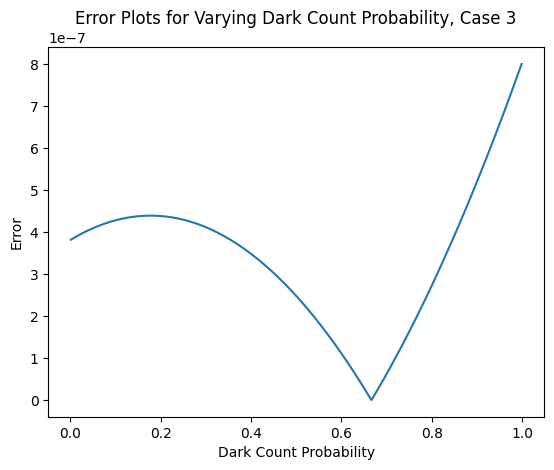

In [9]:
plt.plot(range_PD, error_3_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Error')
plt.title('Error Plots for Varying Dark Count Probability, Case 3')
plt.savefig("error_3_PD_1.png")
plt.show()

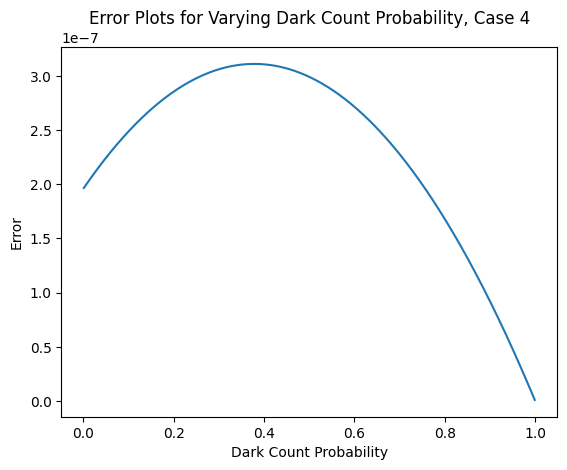

In [10]:
plt.plot(range_PD, error_4_PD)
plt.xlabel('Dark Count Probability')
plt.ylabel('Error')
plt.title('Error Plots for Varying Dark Count Probability, Case 4')
plt.savefig("error_4_PD_1.png")
plt.show()

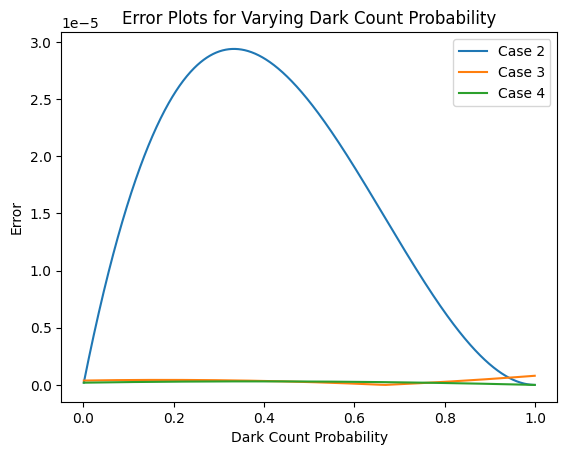

In [11]:
# Plot error bound based on varying dark count probability
plt.plot(range_PD, error_2_PD, label = 'Case 2')
plt.plot(range_PD, error_3_PD, label = 'Case 3')
plt.plot(range_PD, error_4_PD, label = 'Case 4')
plt.xlabel('Dark Count Probability')
plt.ylabel('Error')
plt.title('Error Plots for Varying Dark Count Probability')
plt.legend()
plt.savefig("error_PD_1.png")
plt.show()
# plt.close()

In [12]:
# Error bound based on varying detector efficiency
error_2_eta = []
error_3_eta = []
error_4_eta = []
range_eta = np.arange(0.001, 1, 0.001)
for eta in range_eta:
    error_2_eta.append(case_2_error(P_D, eta, MU))
    error_3_eta.append(case_3_error(P_D, eta, MU))
    error_4_eta.append(case_4_error(P_D, eta, MU))
print(error_2_eta)
print(error_3_eta)
print(error_4_eta)

[1.8950396977461305e-14, 7.24115713864936e-14, 1.5621688094328354e-13, 2.67424026058983e-13, 4.0431479527818434e-13, 5.663948351853979e-13, 7.543933586948463e-13, 9.702629730498361e-13, 1.217179394028548e-12, 1.4995412350328322e-12, 1.8229696823040138e-12, 2.1943083802558063e-12, 2.6216231105547047e-12, 3.1142016049257037e-12, 3.682553179869339e-12, 4.338408690286635e-12, 5.094720163560868e-12, 5.965660636927245e-12, 6.966623766567194e-12, 8.114223818714522e-12, 9.426295292725752e-12, 1.0921892768614189e-11, 1.2621290468710377e-11, 1.4545982342788904e-11, 1.6718681611517646e-11, 1.9163320664813814e-11, 2.1905050592587697e-11, 2.4970241294856952e-11, 2.8386481038748367e-11, 3.2182576329748856e-11, 3.638855143821404e-11, 4.103564857301e-11, 4.6156327371599444e-11, 5.178426481364435e-11, 5.795435472295059e-11, 6.47027079673677e-11, 7.206665195056913e-11, 8.008473052226672e-11, 8.879670347337909e-11, 9.82435467410136e-11, 1.0846745191210507e-10, 1.1951182615904123e-10, 1.3142129165859815e-

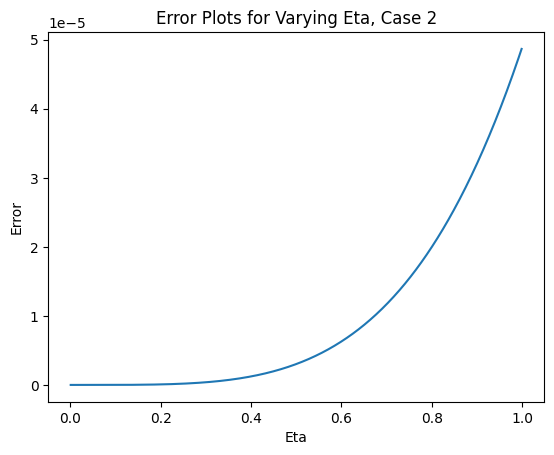

In [13]:
plt.plot(range_eta, error_2_eta)
plt.xlabel('Eta')
plt.ylabel('Error')
plt.title('Error Plots for Varying Eta, Case 2')
plt.savefig("error_2_eta_1.png")
plt.show()

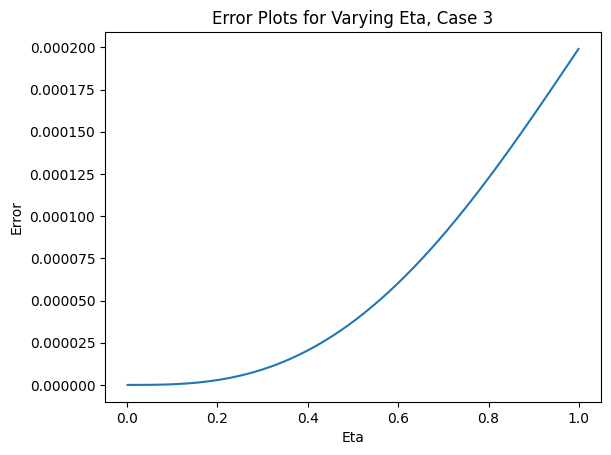

In [14]:
plt.plot(range_eta, error_3_eta)
plt.xlabel('Eta')
plt.ylabel('Error')
plt.title('Error Plots for Varying Eta, Case 3')
plt.savefig("error_3_eta_1.png")
plt.show()

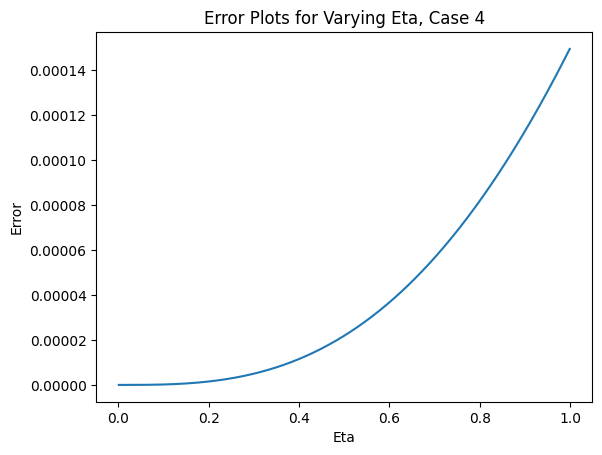

In [15]:
plt.plot(range_eta, error_4_eta)
plt.xlabel('Eta')
plt.ylabel('Error')
plt.title('Error Plots for Varying Eta, Case 4')
plt.savefig("error_4_eta_1.png")
plt.show()

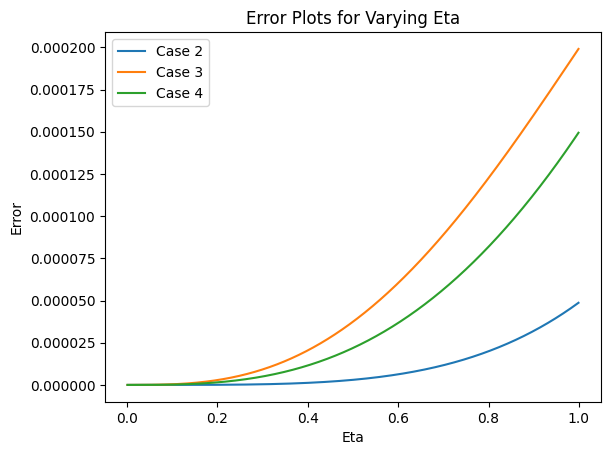

In [16]:
# Plot error bound based on varying detector efficiency
plt.plot(range_eta, error_2_eta, label = 'Case 2')
plt.plot(range_eta, error_3_eta, label = 'Case 3')
plt.plot(range_eta, error_4_eta, label = 'Case 4')
plt.xlabel('Eta')
plt.ylabel('Error')
plt.title('Error Plots for Varying Eta')
plt.legend()
plt.savefig("error_eta_1.png")
plt.show()
# plt.close()

In [17]:
# Error bound based on varying mean number of photons detected on some time interval
error_2_mu = []
error_3_mu = []
error_4_mu = []
range_mu = np.arange(0.001, 1, 0.001)
for mu in range_mu:
    error_2_mu.append(case_2_error(P_D, ETA, mu))
    error_3_mu.append(case_3_error(P_D, ETA, mu))
    error_4_mu.append(case_4_error(P_D, ETA, mu))
print(error_2_mu)
print(error_3_mu)
print(error_4_mu)

[2.238115348552407e-11, 6.906529626260754e-11, 1.3936372557855263e-10, 2.3258818358302307e-10, 3.4805085709680404e-10, 4.8506437752964e-10, 6.429418205719148e-10, 8.209967061184186e-10, 1.0185429980311784e-09, 1.234895103939559e-09, 1.4693678751284537e-09, 1.7212766062875634e-09, 1.9899370353419895e-09, 2.2746653433167088e-09, 2.5747781540858515e-09, 2.8895925342439528e-09, 3.218425992902664e-09, 3.560596481501019e-09, 3.915422393602143e-09, 4.2822225647848365e-09, 4.660316272453837e-09, 5.049023235433243e-09, 5.44766361425112e-09, 5.85555801046187e-09, 6.272027466781762e-09, 6.696393466777218e-09, 7.127977934593766e-09, 7.56610323517288e-09, 8.010092173506593e-09, 8.45926799501696e-09, 8.912954384824234e-09, 9.370475467963693e-09, 9.831155808979076e-09, 1.0294320412139414e-08, 1.075929472054457e-08, 1.122540461669444e-08, 1.1691976421838437e-08, 1.2158336896002592e-08, 1.2623813237501664e-08, 1.3087733083074664e-08, 1.354942450799328e-08, 1.40082160251403e-08, 1.4463436585036718e-08, 

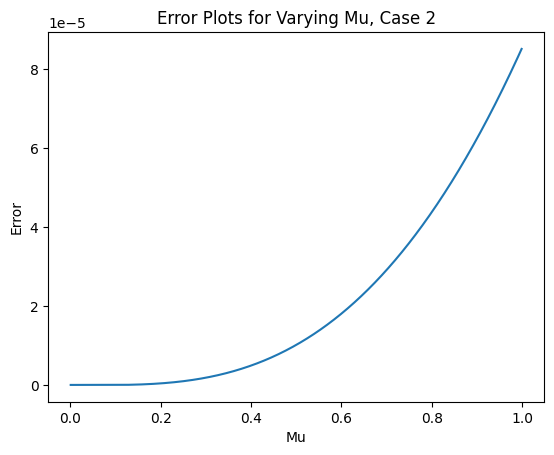

In [18]:
plt.plot(range_mu, error_2_mu)
plt.xlabel('Mu')
plt.ylabel('Error')
plt.title('Error Plots for Varying Mu, Case 2')
plt.savefig("error_2_mu_1.png")
plt.show()

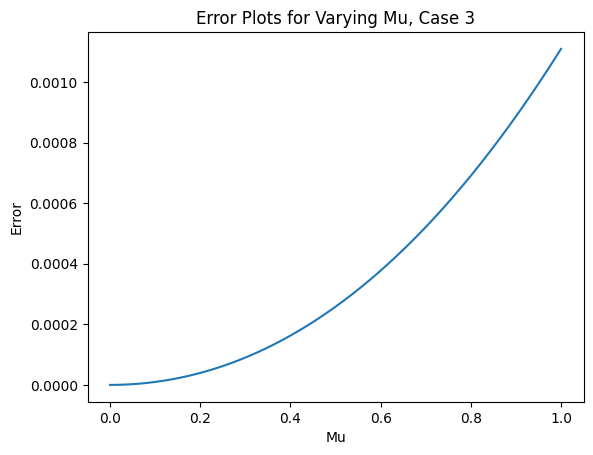

In [19]:
plt.plot(range_mu, error_3_mu)
plt.xlabel('Mu')
plt.ylabel('Error')
plt.title('Error Plots for Varying Mu, Case 3')
plt.savefig("error_3_mu_1.png")
plt.show()

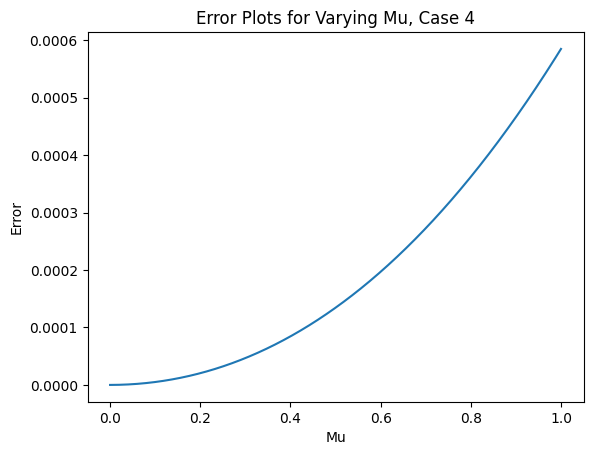

In [20]:
plt.plot(range_mu, error_4_mu)
plt.xlabel('Mu')
plt.ylabel('Error')
plt.title('Error Plots for Varying Mu, Case 4')
plt.savefig("error_4_mu_1.png")
plt.show()

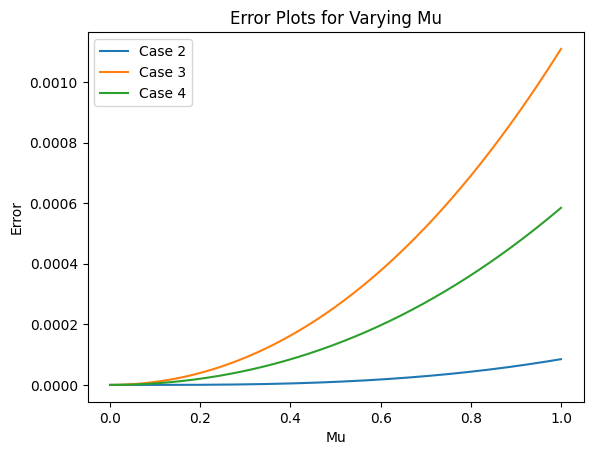

In [21]:
# Plot fidelities based on varying mean number of photons detected on some time interval
plt.plot(range_mu, error_2_mu, label = 'Case 2')
plt.plot(range_mu, error_3_mu, label = 'Case 3')
plt.plot(range_mu, error_4_mu, label = 'Case 4')
plt.xlabel('Mu')
plt.ylabel('Error')
plt.title('Error Plots for Varying Mu')
plt.legend()
plt.savefig("error_mu_1.png")
plt.show()
# plt.close()